## Pokémon

Il dataset (https://www.kaggle.com/datasets/maca11/all-pokemon-dataset) riporta l'elenco di tutti i Pokémon delle prime 8 generazioni. 

Per ogni pokémon ci interesseranno i seguenti campi:
<ul>
    <li>Nome</li>
    <li>Tipo primario</li>
    <li>Tipo secondario</li>
    <li>HP</li>
    <li>ATT</li>
    <li>DEF</li>
    <li>SP ATT</li>
    <li>SP DEF</li>
    <li>SPE</li>
    <li>BST</li>
    <li>Generazione</li>
    <li>È l'ultima evoluzione?</li>
    <li>Tasso di cattura</li>
    <li>È leggendario?</li>
    <li>Efficacia dei tipi contro il pokémon</li>
    <li>Altezza</li>
    <li>Peso</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataset = pd.read_csv("dataset/Pokemon_dataset.csv").astype({"Generation" : int, "Final Evolution": int, "Legendary": int})
dataset

,Name,Type 1,Type 2,HP,Att,Def,Spa,Spd,Spe,BST,...,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,Grass,Poison,80,82,83,100,100,80,525,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,625,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Charmander,Fire,NaN,39,52,43,60,50,65,309,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Glastrier,Ice,NaN,100,145,130,65,110,30,580,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1028,Spectrier,Ghost,NaN,100,65,60,145,80,130,580,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1029,Calyrex,Psychic,Grass,100,80,80,80,80,80,500,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1030,Calyrex Ice Rider,Psychic,Ice,100,165,150,85,130,50,680,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In totale esistono 1032 pokémon (considerando forme diverse dello stesso pokémon come pokémon diversi).

Iniziamo dall'analizzare quanti pokémon sono stati introdotti in ogni generazione:

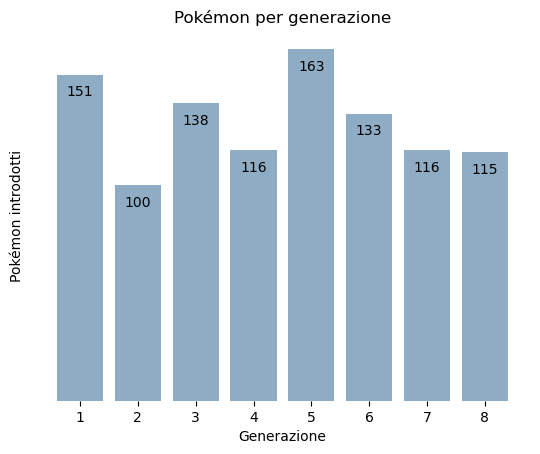

In [2]:
def pokemonByGenerationLabels(x,y):
    for i in x:
        plt.text(i, y[i] - 10, y[i], ha = 'center')

x_axis = dataset['Generation'].unique()
x_axis.sort()
y_axis = dataset.groupby(['Generation']).count()['Name']

plt.bar(x_axis, y_axis, color='#8eadc5')
plt.title("Pokémon per generazione")
plt.xlabel("Generazione")
plt.ylabel("Pokémon introdotti")
plt.yticks([])

plt.gca().set_frame_on(False)
pokemonByGenerationLabels(x_axis, y_axis)

plt.show()

Notiamo come nella prima e quinta generazione sono stati aggiunti molti pokemon, mentre in altre generazioni un pò meno. La generazione che ne ha introdotti di meno è stata la seconda.

Analizziamo, invece, quanti pokémon esistono per ogni tipo:

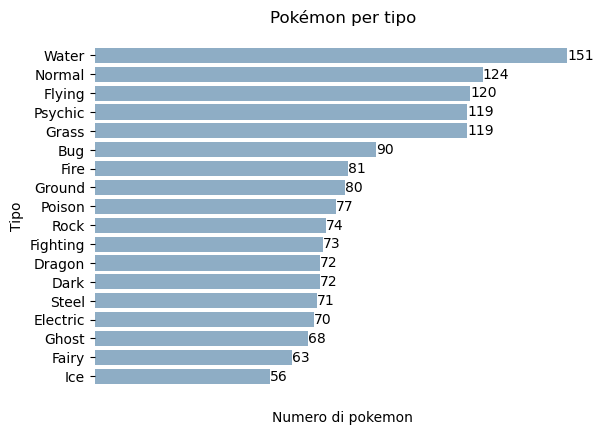

In [3]:
types = dataset['Type 1'].unique()

number_per_types = []
for t in types:
    number_per_types.append(len(dataset[(dataset['Type 1'] == t) | (dataset['Type 2'] == t)]))

type_series = pd.Series(index=types, data=number_per_types).sort_values(ascending=True)
x_axis = type_series.values
y_axis = type_series.index


bars = plt.barh(y_axis, x_axis, color='#8eadc5')
plt.title("Pokémon per tipo")
plt.ylabel("Tipo")
plt.xlabel("Numero di pokemon")
plt.xticks([])
plt.gca().set_frame_on(False)
plt.bar_label(bars)
plt.show()

Notiamo come i pokémon di tipo Acqua sono molto più degli altri, la distribuzione non è così omogenea, inoltre i pokemon del tipo prevalente sono quasi il triplo di quelli del tipo meno prevalente.

Vediamo quanti pokémon hanno un'evoluzione e quanti sono allo stadio finale oppure quanti pokemon sono leggendari e quanti no:

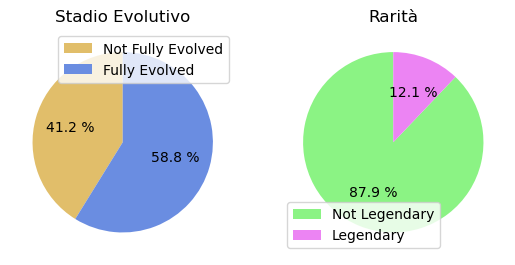

In [4]:
plt.subplot(1, 2, 1)

x_axis = ["Not Fully Evolved", "Fully Evolved"]
y_axis = dataset.groupby(['Final Evolution']).count()['Name']

plt.pie(y_axis, colors = ['#E1BE6A', '#6A8DE1'], autopct="%.1f %%", startangle=90)
plt.title("Stadio Evolutivo")
plt.legend(labels=x_axis)

plt.subplot(1, 2, 2)
x_axis = ["Not Legendary", "Legendary"]
y_axis = dataset.groupby(['Legendary']).count()['Name']

plt.pie(y_axis, colors = ['#8BF384', '#EC84F3'], autopct="%.1f %%", startangle=90)
plt.title("Rarità")
plt.legend(labels=x_axis)

plt.show()

Notiamo che ci sono più pokèmon allo stadio finale rispetto a quelli non completamente evoluti, anche se non è enorme la differenza. D'altro canto sono molti di più i pokémon non leggendari rispetto ai leggendari. Questo ci fa pensare che i pokemon leggendari possano essere "rari".

Ipotizziamo che i leggendari siano più difficili da catturare rispetto ai non leggendari.

Verifichiamo.

L'ipotesi sembra già confermata, ma proviamo a considerare una visualizzazione differente

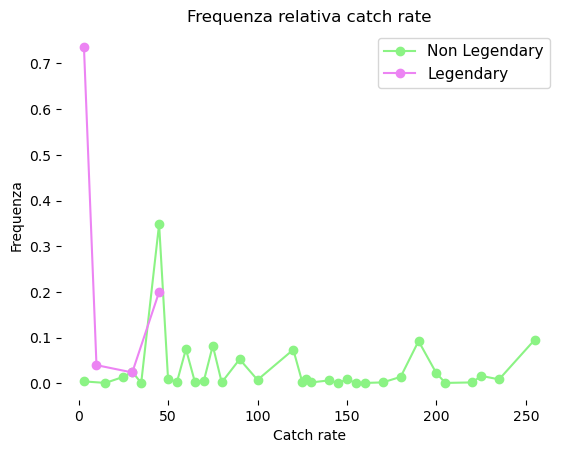

In [27]:
nonLegendaryCatchRate = dataset[dataset['Legendary'] == 0]['Catch Rate']
legendaryCatchRate = dataset[dataset['Legendary'] == 1]['Catch Rate']

x_nl = nonLegendaryCatchRate.unique();
x_nl.sort()
x_l = legendaryCatchRate.unique();
x_l.sort()

y_nl = []
y_l = []


for val in x_nl:
    y_nl.append(nonLegendaryCatchRate[nonLegendaryCatchRate == val].count() / nonLegendaryCatchRate.count())
    
for val in x_l:
    y_l.append(legendaryCatchRate[legendaryCatchRate == val].count() / legendaryCatchRate.count())


plt.plot(x_nl,y_nl, marker='o', label='Non Legendary', color='#8BF384')
plt.plot(x_l,y_l, marker='o', label='Legendary', color='#EC84F3')
plt.xlabel('Catch rate')
plt.ylabel('Frequenza')
plt.legend(fontsize=11)
plt.gca().set_frame_on(False)
plt.title('Frequenza relativa catch rate')

plt.show()

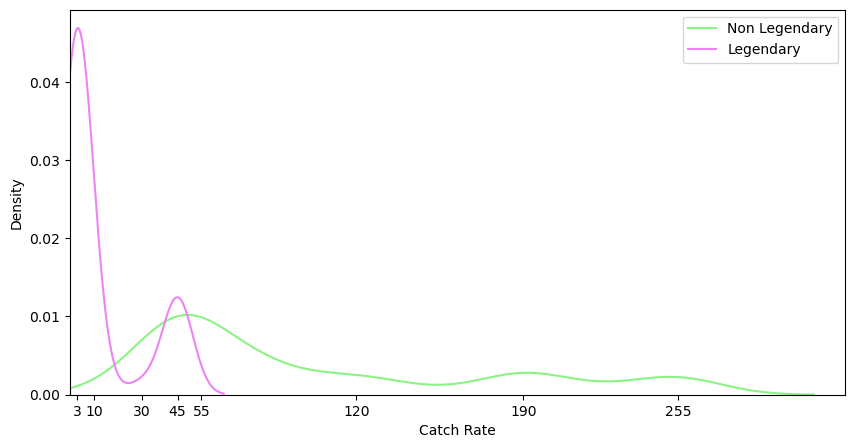

In [6]:
plt.subplots(figsize=(10, 5))

plt.xlim(0, 325)
sns.kdeplot(nonLegendaryCatchRate, color='#8BF384', label='Non Legendary')
sns.kdeplot(legendaryCatchRate, color='#EC84F3', label='Legendary')
plt.xticks([3, 10, 30, 45, 55, 120, 190, 255], ['3', '10', '30', '45', '55', '120', '190', '255'])
plt.legend()

plt.show()

Come si nota dai grafici (normalizzati), pokemon leggendari con basso catch rate sono molti di più di quelli non leggendari, viceversa ci sono più pokemon non leggendari con catch rate alto rispetto ai leggendari.

Vediamo le distribuzioni delle statistiche di base.

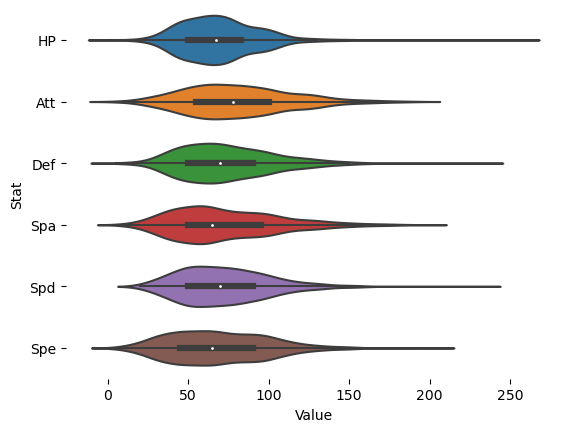

In [7]:
fig, axes = plt.subplots()
sns.violinplot(data=dataset[["HP","Att","Def","Spa","Spd","Spe"]], ax = axes, orient ='h')
plt.ylabel('Stat')
plt.xlabel('Value')
plt.grid(False)
plt.gca().set_frame_on(False)
plt.show()

Abbiamo visto che ci sono due classificazioni principali di pokemon:
<ul>
    <li>Completamente evoluto/non completamente evoluto</li>
    <li>Leggendari/non leggendary</li>
</ul>

Dopo aver analizzato il catch rate per la seconda tipologia di classificazione, analizziamo le differenze di statistiche complessive di base.

Partiamo con la differenza tra pokemon completamente evoluti e non completamente evoluti:

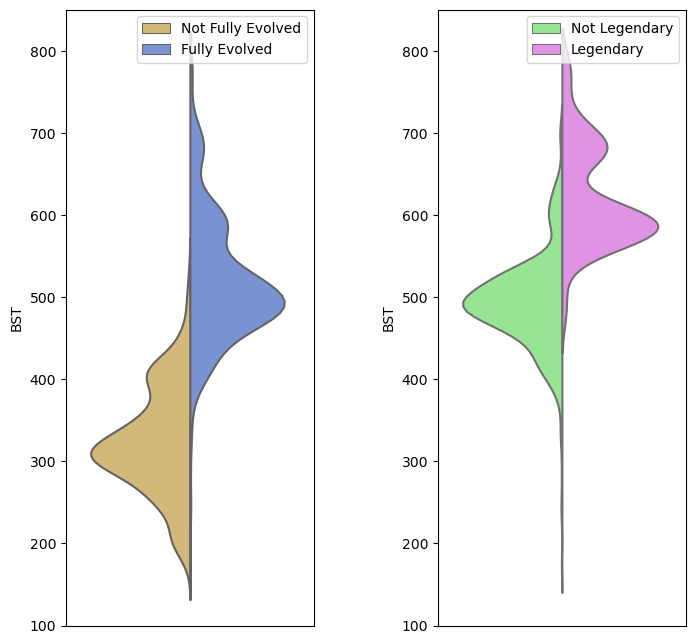

In [8]:
d = dataset[["BST", "Final Evolution", "Legendary"]].copy()
d["all"] = ""

my_pal1 = {0: '#E1BE6A', 1: '#6A8DE1'}
my_pal2 = {0: '#8BF384', 1: '#EC84F3'}

plt.subplots(figsize = (8, 8))

plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace = 0.5)
ax = sns.violinplot(x='all', y='BST', hue='Final Evolution', data=d, split=True, inner=None, palette=my_pal1)
ax.legend(handles=ax.legend_.legendHandles, labels=['Not Fully Evolved', 'Fully Evolved'], loc='upper right')
plt.xlabel("")
plt.xticks([])

plt.ylim([100,850])

plt.subplot(1, 2, 2)
ax = sns.violinplot(x='all', y='BST', hue='Legendary', data=d[d['Final Evolution'] == 1], split=True, inner=None, palette=my_pal2)
ax.legend(handles=ax.legend_.legendHandles, labels=['Not Legendary', 'Legendary'])
plt.xlabel("")
plt.xticks([])


plt.ylim([100,850])

plt.show()

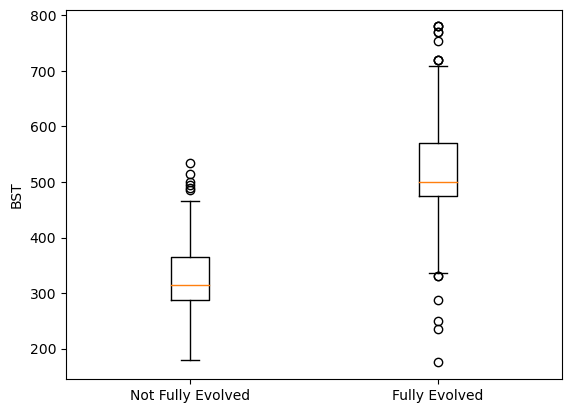

In [9]:
fullyEvolvedBST = d[d['Final Evolution'] == 1]["BST"]
notFullyEvolvedBST = d[d['Final Evolution'] == 0]["BST"]

plt.boxplot([notFullyEvolvedBST, fullyEvolvedBST], labels=["Not Fully Evolved", "Fully Evolved"])
plt.grid(False)
plt.ylabel("BST")

plt.show()

Come si può notare, i pokemon completamente evoluti ...

Ora analizziamo ... considerando solo evoluzioni finali

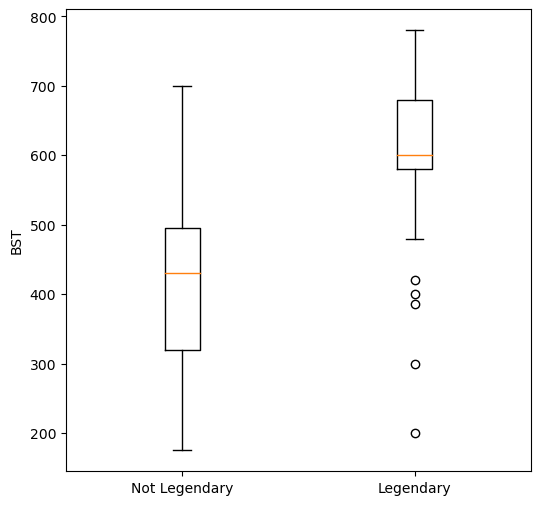

In [10]:
legendary = d[d['Legendary'] == 1]
notLegendary = d[d['Legendary'] == 0]

plt.figure(figsize=(6,6))
plt.boxplot([notLegendary['BST'], legendary['BST']], labels=["Not Legendary", "Legendary"])
plt.grid(False)
plt.ylabel('BST')

plt.show()

Distribuzione pesi e altezze

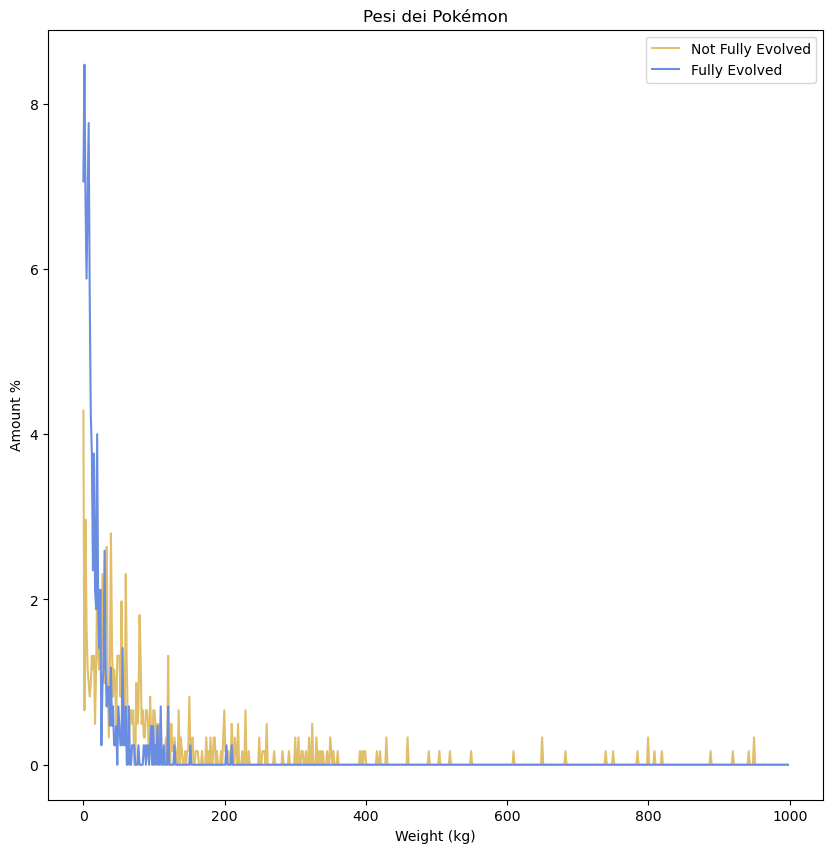

In [11]:
feWeights = dataset[dataset['Final Evolution'] == 1]['Weight']
nfeWeights = dataset[dataset['Final Evolution'] == 0]['Weight']

x = np.arange(0, 999, 1.5)

y1 = []
y2 = []

for i in x:
        y1.append(feWeights[(feWeights >= i) & (feWeights < i + 1.5)].count() / len(feWeights) * 100)
        y2.append(nfeWeights[(nfeWeights >= i) & (nfeWeights < i + 1.5)].count() / len(nfeWeights) * 100)
    
plt.figure(figsize=(10,10))
plt.plot(x, y1, color='#E1BE6A', label='Not Fully Evolved')
plt.plot(x, y2, color='#6A8DE1', label='Fully Evolved')
plt.title('Pesi dei Pokémon')
plt.xlabel('Weight (kg)')
plt.ylabel('Amount %')

plt.legend()

plt.show()

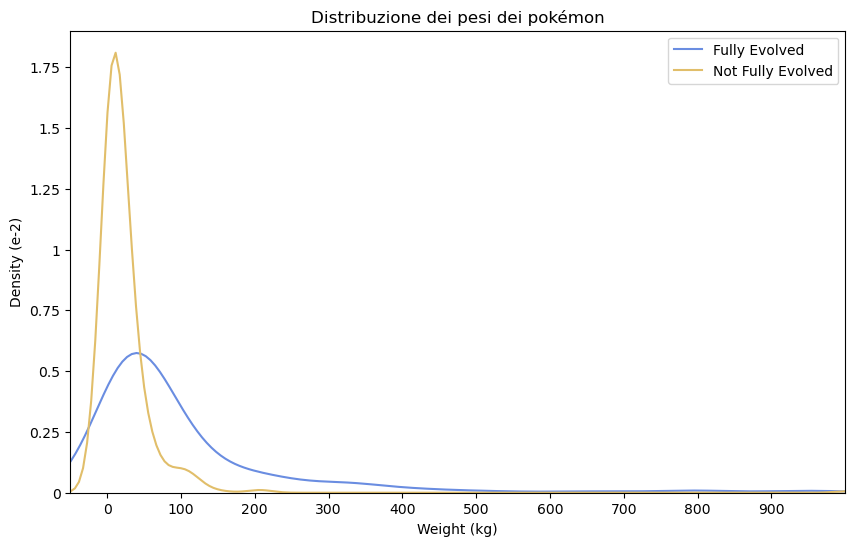

In [12]:
feWeights = dataset[dataset['Final Evolution'] == 1]['Weight']
nfeWeights = dataset[dataset['Final Evolution'] == 0]['Weight']

plt.subplots(figsize=(10, 6))

plt.title("Distribuzione dei pesi dei pokémon")
plt.xlim(-50, 1000)
sns.kdeplot(feWeights, color='#6A8DE1', label='Fully Evolved')
sns.kdeplot(nfeWeights, color='#E1BE6A', label='Not Fully Evolved')
plt.legend()
plt.xticks(range(0, 1000, 100))
plt.yticks([0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.0150, 0.0175], ['0', '0.25', '0.5', '0.75', '1', '1.25', '1.5', '1.75'])
plt.ylabel('Density (e-2)')
plt.xlabel('Weight (kg)')

plt.show()

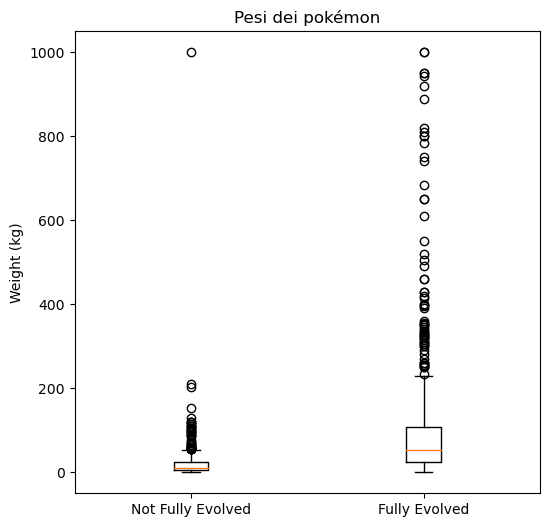

In [13]:
plt.figure(figsize=(6,6))
plt.boxplot([nfeWeights, feWeights], labels=["Not Fully Evolved", "Fully Evolved"])
plt.grid(False)

plt.ylabel("Weight (kg)")
plt.title('Pesi dei pokémon')

plt.show()

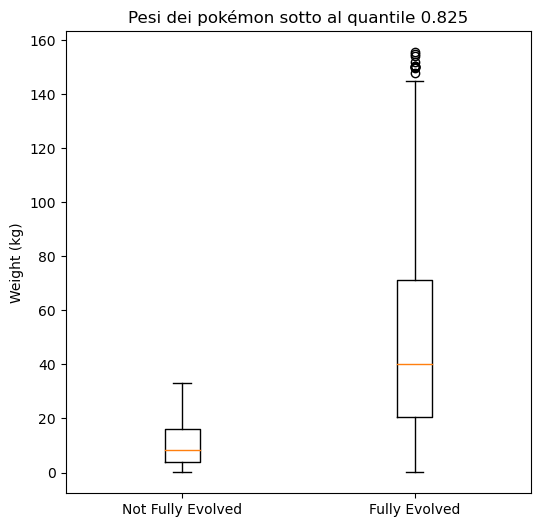

In [14]:
plt.figure(figsize=(6,6))
plt.boxplot([nfeWeights[nfeWeights < nfeWeights.quantile(q=0.825)], feWeights[feWeights < feWeights.quantile(q=0.825)]], labels=["Not Fully Evolved", "Fully Evolved"])
plt.grid(False)
plt.ylabel("Weight (kg)")
plt.title('Pesi dei pokémon sotto al quantile 0.825')

plt.show() 

Altezze

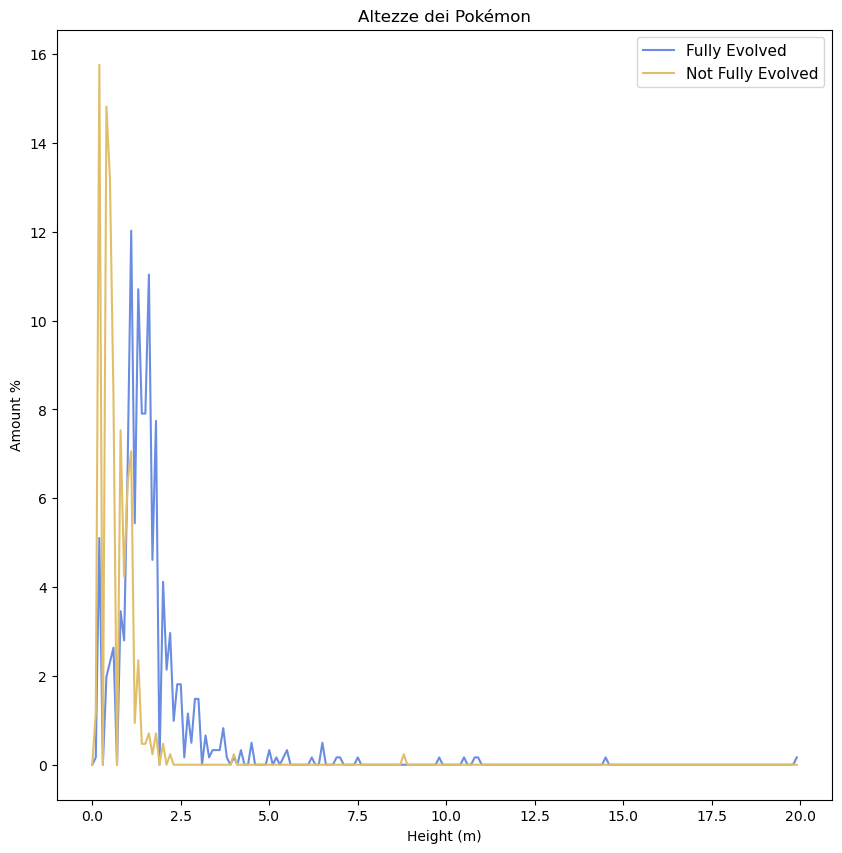

In [15]:
feHeights = dataset[dataset['Final Evolution'] == 1]['Height']
nfeHeights = dataset[dataset['Final Evolution'] == 0]['Height']

x = np.arange(0, 20, 0.1)

y1 = []
y2 = []

for i in x:
        y1.append(feHeights[(feHeights >= i) & (feHeights < i + 0.1)].count() / len(feHeights) * 100)
        y2.append(nfeHeights[(nfeHeights >= i) & (nfeHeights < i + 0.1)].count() / len(nfeHeights) * 100)
    
plt.figure(figsize=(10,10))
plt.plot(x, y1,  color='#6A8DE1', label='Fully Evolved')
plt.plot(x, y2, color='#E1BE6A', label='Not Fully Evolved')
plt.legend(fontsize=11)

plt.title('Altezze dei Pokémon')
plt.xlabel('Height (m)')
plt.ylabel('Amount %')

plt.show()

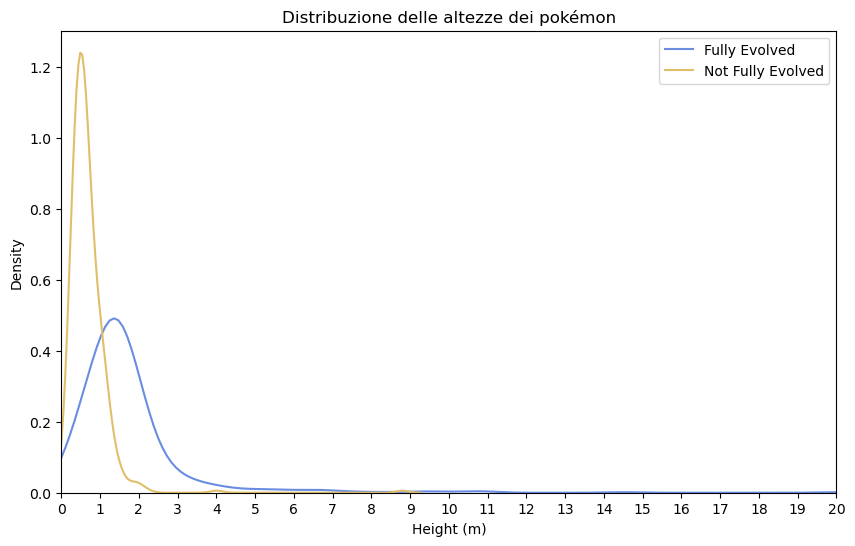

In [16]:
feHeights = dataset[dataset['Final Evolution'] == 1]['Height']
nfeHeights = dataset[dataset['Final Evolution'] == 0]['Height']

plt.subplots(figsize=(10, 6))

plt.title("Distribuzione delle altezze dei pokémon")
plt.xlim(0, 20)
sns.kdeplot(feHeights, color='#6A8DE1', label='Fully Evolved')
sns.kdeplot(nfeHeights, color='#E1BE6A', label='Not Fully Evolved')
plt.legend()
plt.xticks(range(0, 21))
plt.xlabel('Height (m)')

plt.show()

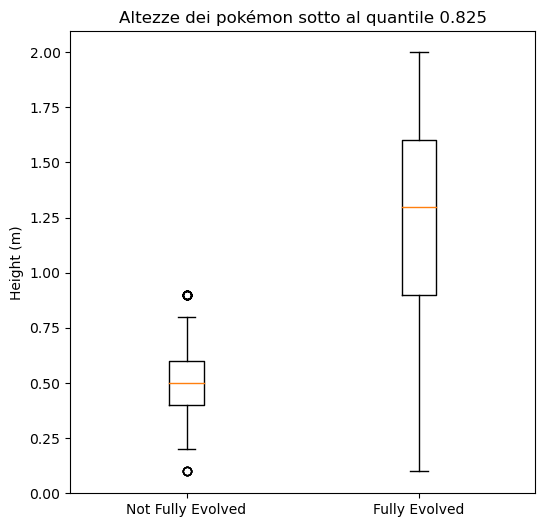

In [17]:
plt.figure(figsize=(6,6))
plt.boxplot([nfeHeights[nfeHeights < nfeHeights.quantile(q=0.825)], feHeights[feHeights < feHeights.quantile(q=0.825)]], labels=["Not Fully Evolved", "Fully Evolved"])
plt.grid(False)
plt.ylabel('Height (m)')
plt.yticks(pd.Series(range(0, 9)) * 0.25)
plt.title('Altezze dei pokémon sotto al quantile 0.825')

plt.show() 

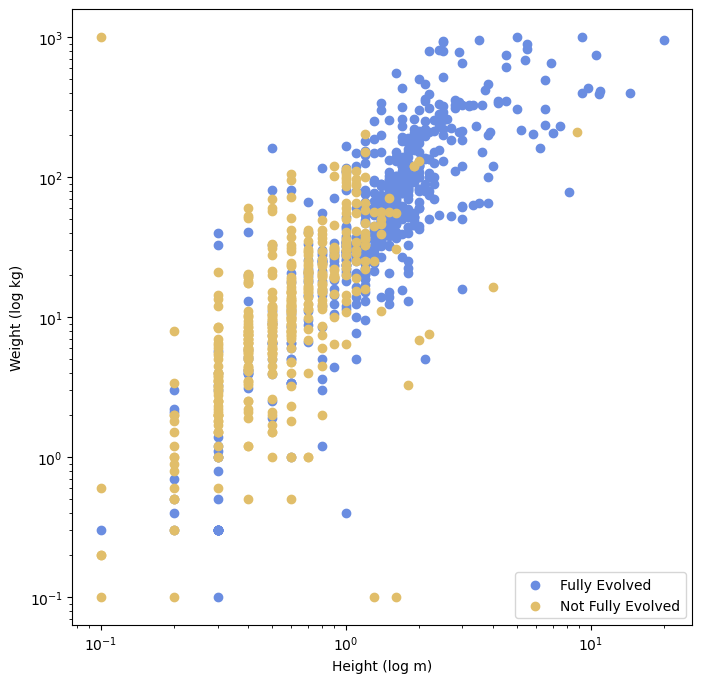

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(feHeights, feWeights, color='#6A8DE1', label='Fully Evolved')
plt.scatter(nfeHeights, nfeWeights, color='#E1BE6A', label='Not Fully Evolved')
plt.legend()
plt.xlabel('Height (log m)')
plt.ylabel('Weight (log kg)')
plt.yscale('log')
plt.xscale('log')

plt.show()

In [19]:
def amountMultiplier(x, mul):
    k = 0
    if (x['Against Normal'] == mul):
        k += 1
    if (x['Against Fire'] == mul):
        k += 1
    if (x['Against Water'] == mul):
        k += 1
    if (x['Against Electric'] == mul):
        k += 1
    if (x['Against Grass'] == mul):
        k += 1
    if (x['Against Ice'] == mul):
        k += 1
    if (x['Against Fighting'] == mul):
        k += 1
    if (x['Against Poison'] == mul):
        k += 1
    if (x['Against Ground'] == mul):
        k += 1
    if (x['Against Flying'] == mul):
        k += 1
    if (x['Against Psychic'] == mul):
        k += 1
    if (x['Against Bug'] == mul):
        k += 1
    if (x['Against Rock'] == mul):
        k += 1
    if (x['Against Ghost'] == mul):
        k += 1
    if (x['Against Dragon'] == mul):
        k += 1
    if (x['Against Dark'] == mul):
        k += 1
    if (x['Against Steel'] == mul):
        k += 1
    if (x['Against Fairy'] == mul):
        k += 1
    return k

def generateValues(mul):
    values = []
    for i in counter:
        c = 0
        for index, row in dataset.iterrows():
            if (amountMultiplier(row, mul) == i):
                c += 1
        values.append(c/len(dataset))
    return values

counter = range(0,18)
immunities = generateValues(0)
superWeak = generateValues(0.25)
weak = generateValues(0.5)
neutral = generateValues(1)
superEffective = generateValues(2)
ultraEffective = generateValues(4)

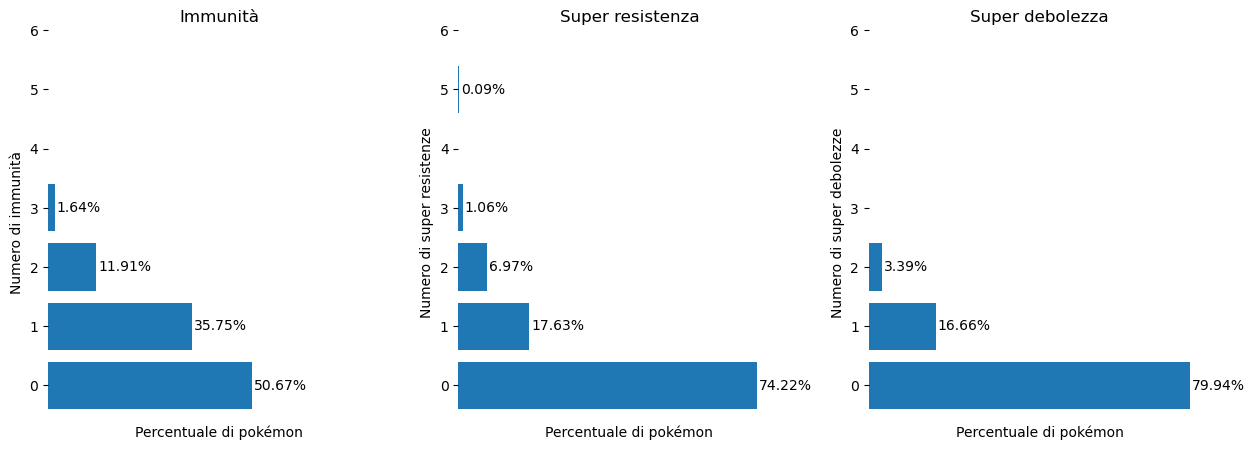

In [20]:
def ceil(x):
    return int(x*100)/100

def addlabels3(x,y):
    for i in x:
        if (ceil(y[i] * 100)> 0):
            plt.text(i, y[i] + 0.02, str(ceil(y[i] * 100)) + '%', ha = 'center')
            
def addLabels4(values):
    for i, v in enumerate(values):
        if (v > 0):
            plt.text(v + 0.005, i, str(ceil(v * 100)) + '%', va='center')
              

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
bars = plt.barh(counter, immunities)
plt.ylim(-0.5,6)
plt.xlim(0, 0.85)
plt.xlabel('Percentuale di pokémon')
plt.ylabel('Numero di immunità')
plt.title('Immunità')
plt.xticks([])
plt.yticks(range(0, 7))
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(immunities)

plt.subplot(1,3,2)
bars = plt.barh(counter, superWeak)
plt.ylim(-0.5, 6)
plt.xlim(0,0.85)
plt.xlabel('Percentuale di pokémon')
plt.ylabel('Numero di super resistenze')
plt.title('Super resistenza')
plt.xticks([])
plt.yticks(range(0, 7))
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(superWeak)

plt.subplot(1,3,3)
bars = plt.barh(counter, ultraEffective)
plt.ylim(-0.5,6)
plt.xlim(0,0.85)
plt.xlabel('Percentuale di pokémon')
plt.ylabel('Numero di super debolezze')
plt.title('Super debolezza')
plt.xticks([])
plt.yticks(range(0, 7))
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(ultraEffective)


plt.show()

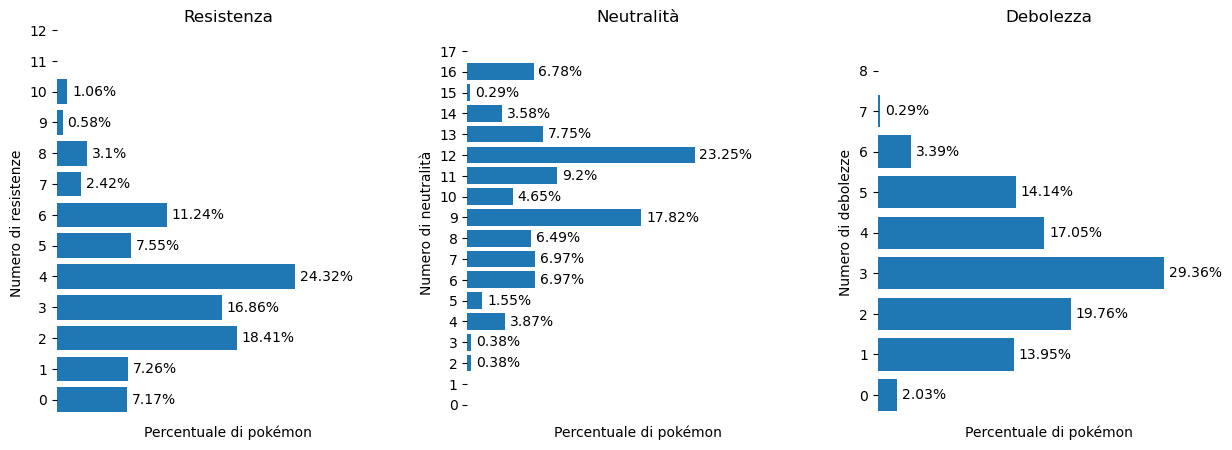

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
bars = plt.barh(counter, weak)
plt.ylim(-0.5,12)
plt.xlim(0, 0.35)
plt.xlabel('Percentuale di pokémon')
plt.ylabel('Numero di resistenze')
plt.title('Resistenza')
plt.xticks([])
plt.yticks(range(0, 13))
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(weak)

plt.subplot(1,3,2)
bars = plt.barh(counter, neutral)
plt.ylim(-0.5,18)
plt.xlim(0, 0.35)
plt.ylabel('Numero di neutralità')
plt.xlabel('Percentuale di pokémon')
plt.title('Neutralità')
plt.xticks([])
plt.yticks(range(0, 18))
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(neutral)

plt.subplot(1,3,3)
bars = plt.barh(counter, superEffective)
plt.ylim(-0.5,9)
plt.xlim(0, 0.35)
plt.ylabel('Numero di debolezze')
plt.xlabel('Percentuale di pokémon')
plt.title('Debolezza')
plt.xticks([])
plt.yticks(range(0, 9))
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(superEffective)

plt.show()

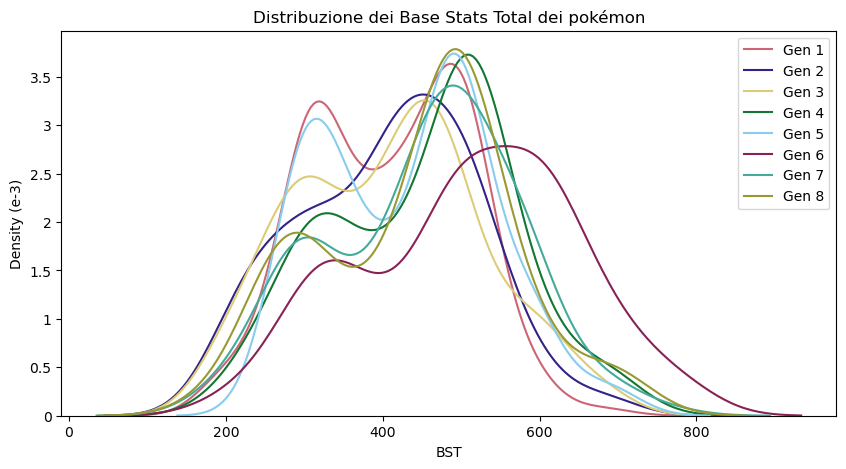

In [22]:
gens = range(1, 9)
bst_by_gen = []

grouped_by_gen = dataset.groupby('Generation')

for i in gens:
    bst_by_gen.append(grouped_by_gen.get_group(i)['BST'])

plt.subplots(figsize=(10, 5))
plt.title("Distribuzione dei Base Stats Total dei pokémon")
sns.kdeplot(bst_by_gen[0], color='#CC6677', label='Gen 1')
sns.kdeplot(bst_by_gen[1], color='#332288', label='Gen 2')
sns.kdeplot(bst_by_gen[2], color='#DDCC77', label='Gen 3')
sns.kdeplot(bst_by_gen[3], color='#117733', label='Gen 4')
sns.kdeplot(bst_by_gen[4], color='#88CCEE', label='Gen 5')
sns.kdeplot(bst_by_gen[5], color='#882255', label='Gen 6')
sns.kdeplot(bst_by_gen[6], color='#44AA99', label='Gen 7')
sns.kdeplot(bst_by_gen[7], color='#999933', label='Gen 8')
plt.yticks([0, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035], ['0', '0.5', '1', '1.5', '2', '2.5', '3', '3.5'])
plt.ylabel('Density (e-3)')

plt.legend()

plt.show()

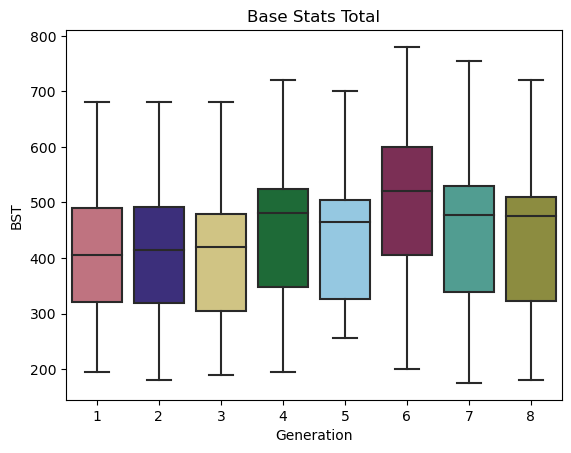

In [23]:
plt.title("Base Stats Total")

my_pal = {1: '#CC6677', 2: '#332288', 3: '#DDCC77', 4: '#117733', 5: '#88CCEE', 6: '#882255', 7: '#44AA99', 8: '#999933'}
sns.boxplot(data=dataset, y='BST', x='Generation', palette=my_pal)
plt.show()

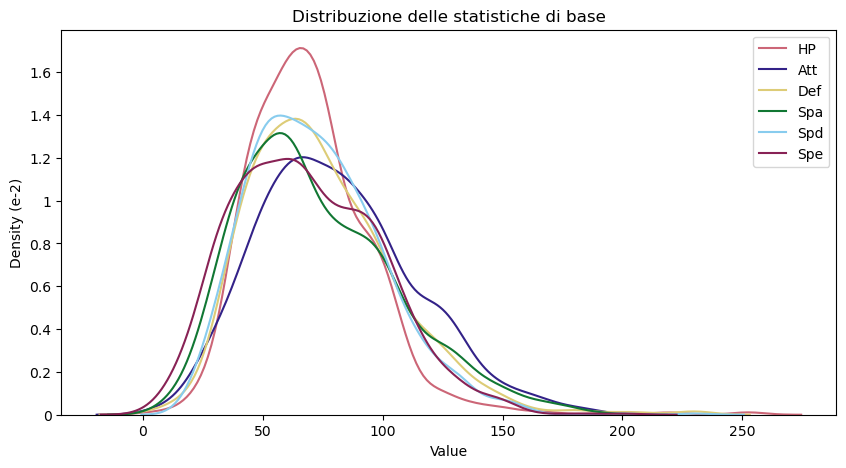

In [24]:
stats = ['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']
values_by_stats = []

for i in stats:
    values_by_stats.append(dataset[i])

plt.subplots(figsize=(10, 5))
plt.title("Distribuzione delle statistiche di base")
sns.kdeplot(values_by_stats[0], color='#CC6677', label='HP')
sns.kdeplot(values_by_stats[1], color='#332288', label='Att')
sns.kdeplot(values_by_stats[2], color='#DDCC77', label='Def')
sns.kdeplot(values_by_stats[3], color='#117733', label='Spa')
sns.kdeplot(values_by_stats[4], color='#88CCEE', label='Spd')
sns.kdeplot(values_by_stats[5], color='#882255', label='Spe')
plt.yticks([0, 0.002, 0.004, 0.006, 0.008, 0.010, 0.012, 0.014, 0.016], ['0', '0.2', '0.4', '0.6', '0.8', '1', '1.2', '1.4', '1.6'])
plt.ylabel('Density (e-2)')
plt.xlabel('Value')

plt.legend()

plt.show()

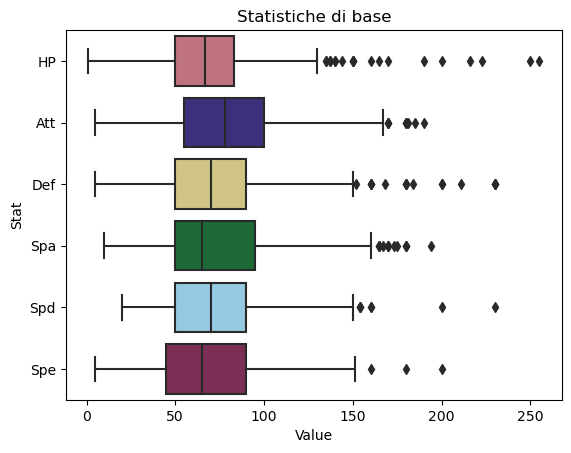

In [25]:
plt.title("Statistiche di base")

pokemon = dataset['Name'].count()

stats = []

for i in range(0, pokemon):
    stats += ['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']
    
values = []

for p in dataset.iterrows():
    poke = p[1]
    values += [poke['HP'], poke['Att'], poke['Def'], poke['Spa'], poke['Spd'], poke['Spe']]

statsDf = pd.DataFrame({'Stat': stats, 'Value': values})

my_pal = {'HP': '#CC6677', 'Att': '#332288', 'Def': '#DDCC77', 'Spa': '#117733', 'Spd': '#88CCEE', 'Spe': '#882255'}
sns.boxplot(data=statsDf, x='Value', y='Stat', palette=my_pal)
plt.xlabel('Value')
plt.ylabel('Stat')

plt.show()

### Comandi per pulire il dataset

In [26]:
#cols = ['Name', 'Type 1', 'Type 2', 'HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe', 'BST', 'Generation', 'Final Evolution', 'Catch Rate', 'Legendary', 'Weight', 'Height']
#cols += ['Against Normal', 'Against Fire', 'Against Water', 'Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting', 'Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic', 'Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon', 'Against Dark', 'Against Steel', 'Against Fairy']
# dataset.to_csv('dataset/Pokemon_dataset.csv', columns=cols, index=False)